# Avocado project: Data Wrangling

## Import years 2016, 2017 and 2018 as DataFrames

In [1]:
# Imports 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

The data is available as Excel files to download from http://www.hassavocadoboard.com/retail/volume-and-price-data

I had to open and save the files with Excel before reading them here.

In [2]:
# Read 2016, 2017, 2018 xls files into 2 dataframes (conventional and organic)
df_con = pd.DataFrame()
df_org = pd.DataFrame()

years = ['2016','2017','2018']

for year in years:
    xls_con = pd.read_excel('HAB_Retail_Volume_and_Price_'+year+'_conventional_TotalUS.xls','Worksheet')
    df_con = df_con.append(xls_con)
    xls_org = pd.read_excel('HAB_Retail_Volume_and_Price_'+year+'_organic_TotalUS.xls','Worksheet')
    df_org = df_org.append(xls_org)


In [3]:
# Have a look at Conventional avocados
df_con.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,81101.22
1,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,94011.78
2,2016-12-11,0.98,30093540.70,9009996.11,9967220.02,403047.93,10713276.64,8149438.75,2490495.07,73342.82
3,2016-12-04,1.00,31621221.90,11043350.90,9908982.97,428009.84,10240878.19,7187022.58,2988504.98,65350.63
4,2016-11-27,1.21,22923062.65,7891487.94,7337341.77,344475.90,7349757.04,5691266.56,1609867.20,48623.28


In [4]:
# Have a look at Organic avocados
df_org.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2016-12-25,1.34,914035.42,93875.25,250138.66,3415.27,566606.24,330909.02,235697.22,0.0
1,2016-12-18,1.43,797042.27,97661.23,248598.14,4926.76,445856.14,279458.24,166397.90,0.0
2,2016-12-11,1.42,856795.63,93027.82,248303.87,6116.44,509347.50,293760.79,215586.71,0.0
3,2016-12-04,1.56,832767.55,106472.53,242055.86,2918.28,481320.88,284858.65,196462.23,0.0
4,2016-11-27,1.64,761675.87,100240.54,198874.09,3381.69,459179.55,292770.32,166409.23,0.0


In [5]:
# Prepare for concat: set column names

df_con.columns = ['date','con_price','con_volume','con_4046','con_4225','con_4770','con_bags','con_s_bags','con_l_bags','con_xl_bags']
df_org.columns = ['date','org_price','org_volume','org_4046','org_4225','org_4770','org_bags','org_s_bags','org_l_bags','org_xl_bags']


In [6]:
# Prepare for concat: set datetime index

df_con.date = pd.to_datetime(df_con.date, errors='coerce')
df_con.set_index('date',inplace=True)
df_con.sort_index(inplace=True)

df_org.date = pd.to_datetime(df_org.date, errors='coerce')
df_org.set_index('date',inplace=True)
df_org.sort_index(inplace=True)


In [7]:
# concat conventional and organic

df = pd.concat([df_con,df_org],axis='columns')

## Get statistics info

In [8]:
df.head()

,con_price,con_volume,con_4046,con_4225,con_4770,con_bags,con_s_bags,con_l_bags,con_xl_bags,org_price,org_volume,org_4046,org_4225,org_4770,org_bags,org_s_bags,org_l_bags,org_xl_bags
date,,,,,,,,,,,,,,,,,,
2016-01-03,0.86,38142088.04,11616506.17,16054083.86,1560068.62,8911429.39,6464895.83,2287449.76,159083.80,1.43,704100.50,124799.63,246580.95,7749.40,324970.52,150967.35,174003.17,0.0
2016-01-10,0.93,35264336.01,11441286.89,13226088.66,1282612.91,9314347.55,6735384.32,2528089.14,50874.09,1.35,828670.59,113867.63,287590.19,8771.79,418440.98,183115.43,235325.55,0.0
2016-01-17,0.94,34426341.87,10036597.84,13832256.04,1419405.62,9138082.37,6846324.06,2228420.91,63337.40,1.44,695341.42,115992.81,266824.72,13106.29,299417.60,150719.73,148697.87,0.0
2016-01-24,0.95,32787079.21,7020459.00,14054367.50,1440380.36,10271872.35,7438489.60,2668368.01,165014.74,1.41,776964.55,99316.69,270980.88,12933.97,393733.01,204859.71,188873.30,0.0
2016-01-31,0.93,34721249.92,11098088.49,13278053.61,1643703.17,8701404.65,6684515.27,1823889.58,192999.80,1.43,772077.20,108929.21,269687.52,5515.91,387944.56,204288.83,183655.73,0.0


In [9]:
df.tail()

,con_price,con_volume,con_4046,con_4225,con_4770,con_bags,con_s_bags,con_l_bags,con_xl_bags,org_price,org_volume,org_4046,org_4225,org_4770,org_bags,org_s_bags,org_l_bags,org_xl_bags
date,,,,,,,,,,,,,,,,,,
2018-07-15,1.07,43126773.22,13457479.92,12125207.59,908599.10,16635486.61,11924570.43,4460656.29,250259.89,1.58,1568944.98,155018.27,349923.01,1277.10,1062513.79,850384.88,212101.67,27.24
2018-08-19,1.13,40735732.68,12009246.19,11634725.16,1116318.45,15975442.88,11055173.29,4500204.69,420064.90,1.64,1401564.09,152939.89,297706.16,1745.31,948992.75,759918.27,189013.68,60.80
2018-08-26,1.22,36867974.58,11171123.21,11286479.97,699010.18,13711361.22,9484135.03,3930111.90,297114.29,1.65,1444798.30,166581.33,311652.30,1248.17,965140.20,830395.38,134548.43,196.39
2018-09-02,1.29,36169161.57,10916802.88,10880826.30,777527.98,13594004.41,9783860.21,3485418.35,324725.85,1.71,1556510.73,184937.59,304181.81,1242.46,1066108.68,852155.51,213468.55,484.62
2018-09-09,1.24,37484253.75,11028194.47,11898526.09,859246.52,13698286.67,9876854.43,3505978.13,315454.11,1.70,1517213.66,161144.72,278782.12,1961.65,1075193.22,894931.88,180220.19,41.15


In [10]:
df.describe()

,con_price,con_volume,con_4046,con_4225,con_4770,con_bags,con_s_bags,con_l_bags,con_xl_bags,org_price,org_volume,org_4046,org_4225,org_4770,org_bags,org_s_bags,org_l_bags,org_xl_bags
count,137.000000,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.000000,137.000000,1.370000e+02,1.370000e+02,137.000000,137.000000
mean,1.119562,3.624384e+07,1.222671e+07,1.148925e+07,8.694176e+05,1.165846e+07,8.631156e+06,2.843477e+06,183828.663577,1.562920,1.192683e+06,136241.377664,324438.548394,4669.342628,7.204100e+05,5.303919e+05,189970.424964,47.712993
std,0.186014,7.278148e+06,2.521229e+06,2.495506e+06,4.609096e+05,2.884441e+06,2.033298e+06,9.334534e+05,107083.534172,0.183015,3.116824e+05,33760.792098,78199.740609,4185.705533,2.583904e+05,2.373227e+05,83172.710089,100.618481
min,0.760000,2.100973e+07,7.020459e+06,6.852046e+06,3.444759e+05,6.604080e+06,4.655046e+06,1.431745e+06,40918.740000,1.160000,6.477236e+05,77759.930000,198874.090000,834.300000,2.384035e+05,1.507197e+05,57772.160000,0.000000
25%,0.980000,3.205159e+07,1.095270e+07,9.967220e+06,5.498446e+05,9.700550e+06,7.187023e+06,2.150749e+06,82386.140000,1.440000,9.757243e+05,110120.490000,266687.470000,1580.010000,5.093475e+05,3.206522e+05,131040.860000,0.000000
50%,1.090000,3.633548e+07,1.209132e+07,1.115431e+07,7.225588e+05,1.077313e+07,8.376124e+06,2.638918e+06,165014.740000,1.540000,1.119325e+06,131467.240000,317184.040000,3415.270000,6.893018e+05,4.894560e+05,180049.000000,0.000000
75%,1.220000,4.001908e+07,1.349055e+07,1.289637e+07,9.692389e+05,1.326574e+07,9.866218e+06,3.339215e+06,269450.960000,1.670000,1.401564e+06,156417.330000,359772.180000,6707.820000,8.932057e+05,7.233045e+05,224646.550000,41.150000
max,1.650000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.162537e+07,1.543625e+07,5.840415e+06,551693.650000,2.090000,2.114577e+06,250591.210000,680037.450000,26765.780000,1.373724e+06,1.054811e+06,561530.390000,613.750000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2016-01-03 to 2018-09-09
Data columns (total 18 columns):
con_price      137 non-null float64
con_volume     137 non-null float64
con_4046       137 non-null float64
con_4225       137 non-null float64
con_4770       137 non-null float64
con_bags       137 non-null float64
con_s_bags     137 non-null float64
con_l_bags     137 non-null float64
con_xl_bags    137 non-null float64
org_price      137 non-null float64
org_volume     137 non-null float64
org_4046       137 non-null float64
org_4225       137 non-null float64
org_4770       137 non-null float64
org_bags       137 non-null float64
org_s_bags     137 non-null float64
org_l_bags     137 non-null float64
org_xl_bags    137 non-null float64
dtypes: float64(18)
memory usage: 20.3 KB


The data spans from 01/03/2016 to 09/09/2018.

There are 137 rows, no null values.

There are 18 columns, all of float64 type.

type 4046 identify small/medium Hass avocado, type 4225 identify large Hass avocado, type 4770 identify extra large avocado. You can see this product lookup code (PLU) on the avocado sticker.

## Plot

The max for conventional avocado volume is 30 times the one for organic avocado, so I will have to plot them separately.

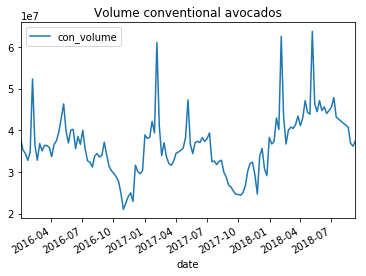

In [12]:
plt.clf()
df.plot(y='con_volume', title='Volume conventional avocados')
plt.show()

I can see some peaks in the plot. Are these outliers?

I don’t think so because:
- These peaks appear each year at the same period
- These peaks appear on the plots for each type of avocado

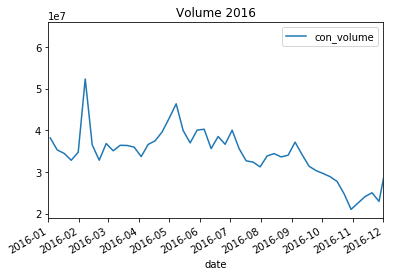

In [13]:
plt.clf()
df.plot(xlim=('2016-01','2016-12'), y='con_volume', title = 'Volume 2016')
plt.show()

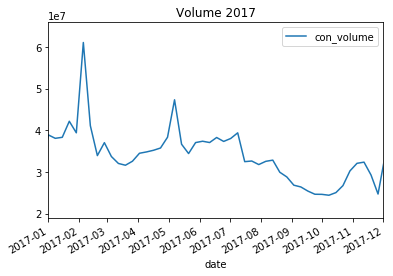

In [14]:
plt.clf()
df.plot(xlim=('2017-01','2017-12'), y='con_volume', title = 'Volume 2017')
plt.show()

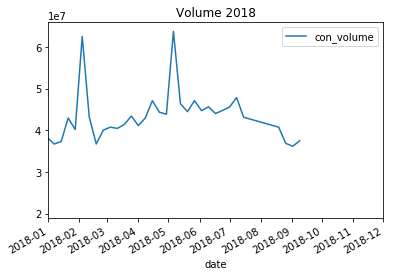

In [15]:
plt.clf()
df.plot(xlim=('2018-01','2018-12'), y='con_volume', title = 'Volume 2018')
plt.show()

There is a pattern that reproduces every year, with peaks at the beginning of February, and beginning of May.

Are these peaks related to holidays?

Maybe, beginning of February is Mexican Constitution Day, beginning of May is Cinco de Mayo. However, some holidays don’t seem to have the same impact on avocado sales: Halloween, Thanksgiving.

My first idea was to flag the dates as holiday/not holiday, but after this preview of the data, I will mark the dates with specific holidays.

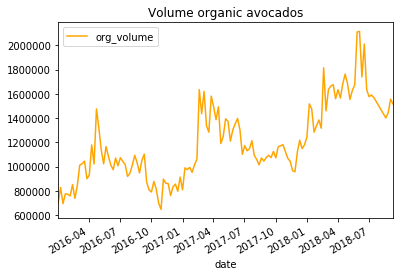

In [16]:
plt.clf()
df.plot(y='org_volume', title='Volume organic avocados', color='orange')
plt.show()

The organic avocados follow the same pattern as conventional avocados, but the peaks are smoother.

The price is USD 0.76 to USD 2.09 so I can plot the unit price for conventional and organic avocados together.

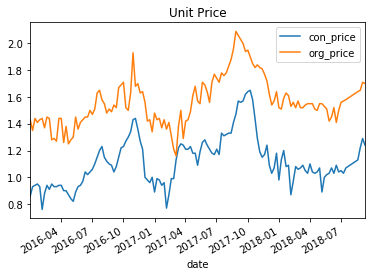

In [17]:
plt.clf()
df.plot(y=['con_price','org_price'], title = 'Unit Price')
plt.show()

It seems there is a negative correlation between price and volume: high volume corresponding to low price.
It could be interesting to plot the revenue, to see if it’s stable.

In [18]:
plot_df = pd.DataFrame()
plot_df['con_revenue'] = df['con_price']*df['con_volume']
plot_df['org_revenue'] = df['org_price']*df['org_volume']

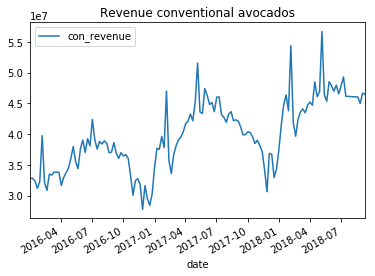

In [19]:
plt.clf()
plot_df.plot(y='con_revenue', title='Revenue conventional avocados')
plt.show()

This plot reflects the same highs and lows as the volume plot.

## Merge holidays

I define the holidays as lists for each year. I will use the most important U.S holidays and add the Mexico constitution day and Cinco de Mayo.


In [20]:
# Define holidays

holidays = ['new_year','mlk_day','mexico_constitution','valentine','president','st_patrick','easter','cinco_mayo',
           'memorial','independence','labor','columbus','halloween','veterans','thanksgiving','christmas']
dates2016 = ['2016-01-01','2016-01-18','2016-02-01','2016-02-14','2016-02-15','2016-03-17','2016-03-27','2016-05-05',
             '2016-05-30','2016-07-04','2016-09-05','2016-10-10','2016-10-31','2016-11-11','2016-11-24','2016-12-25']
dates2017 = ['2017-01-01','2017-01-16','2017-02-06','2017-02-14','2017-02-20','2017-03-17','2017-04-16','2017-05-05',
             '2017-05-29','2017-07-04','2017-09-04','2017-10-09','2017-10-31','2017-11-11','2017-11-23','2017-12-25']
dates2018 = ['2018-01-01','2018-01-15','2018-02-05','2018-02-14','2018-02-19','2018-03-17','2018-04-01','2018-05-05',
             '2018-05-28','2018-07-04','2018-09-03','2018-10-08','2018-10-31','2018-11-11','2018-11-22','2018-12-25']

In [21]:
# Create Dataframe for holidays

hdf = pd.DataFrame({'holiday': holidays, 'date': dates2016})
hdf = hdf.append(pd.DataFrame({'holiday': holidays, 'date': dates2017}))
hdf = hdf.append(pd.DataFrame({'holiday': holidays, 'date': dates2018}))

In [22]:
# Set datetime index

hdf.date = pd.to_datetime(hdf.date, errors='coerce')
hdf.set_index('date',inplace=True)
hdf.sort_index(inplace=True)

In [23]:
# Reindex the holidays with the avocado data index
# I hesitated with backward fill (because you shop before the holiday), 
# but the sales are reported at the end of the week, 
# so I think nearest method is more accurate.

hdf = hdf.reindex(df.index,method='nearest',limit=1, fill_value='')

In [24]:
# Concat avocado data with the holidays

df = pd.concat([df,hdf],axis='columns')
df.head()

,con_price,con_volume,con_4046,con_4225,con_4770,con_bags,con_s_bags,con_l_bags,con_xl_bags,org_price,org_volume,org_4046,org_4225,org_4770,org_bags,org_s_bags,org_l_bags,org_xl_bags,holiday
date,,,,,,,,,,,,,,,,,,,
2016-01-03,0.86,38142088.04,11616506.17,16054083.86,1560068.62,8911429.39,6464895.83,2287449.76,159083.80,1.43,704100.50,124799.63,246580.95,7749.40,324970.52,150967.35,174003.17,0.0,new_year
2016-01-10,0.93,35264336.01,11441286.89,13226088.66,1282612.91,9314347.55,6735384.32,2528089.14,50874.09,1.35,828670.59,113867.63,287590.19,8771.79,418440.98,183115.43,235325.55,0.0,
2016-01-17,0.94,34426341.87,10036597.84,13832256.04,1419405.62,9138082.37,6846324.06,2228420.91,63337.40,1.44,695341.42,115992.81,266824.72,13106.29,299417.60,150719.73,148697.87,0.0,mlk_day
2016-01-24,0.95,32787079.21,7020459.00,14054367.50,1440380.36,10271872.35,7438489.60,2668368.01,165014.74,1.41,776964.55,99316.69,270980.88,12933.97,393733.01,204859.71,188873.30,0.0,mlk_day
2016-01-31,0.93,34721249.92,11098088.49,13278053.61,1643703.17,8701404.65,6684515.27,1823889.58,192999.80,1.43,772077.20,108929.21,269687.52,5515.91,387944.56,204288.83,183655.73,0.0,mexico_constitution


# Avocado project: Data Exploration

## Plot the volume evolution for all avocados over time and add a red dot for the holidays

In [25]:
plt.style.use('classic')

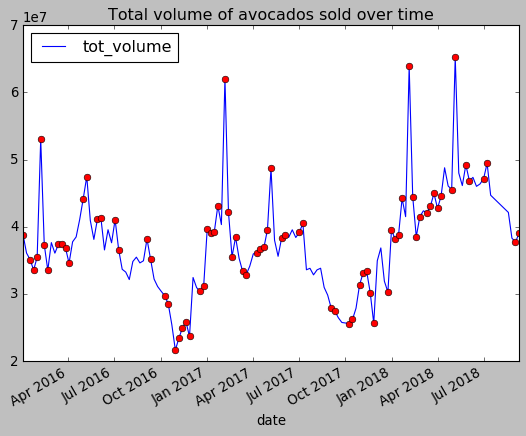

In [26]:
# Calculate total volume
df['tot_volume'] = df['con_volume'] + df['org_volume']

# plot the total volume of avocados as line plot
df.plot(y=['tot_volume'])

# plot the holidays as red dots
h_df = df[df['holiday']!='']
plt.plot(h_df['tot_volume'],'ro')

plt.title('Total volume of avocados sold over time')
plt.show()


The peaks I see correspond to holidays, so they have an impact on the data. But some holidays seem to have no impact. Let's try to focus on the holidays that have an impact.

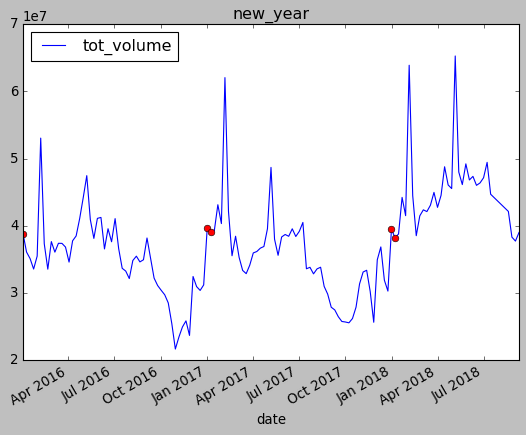

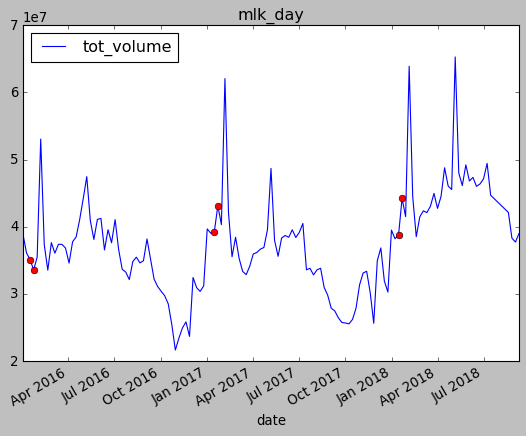

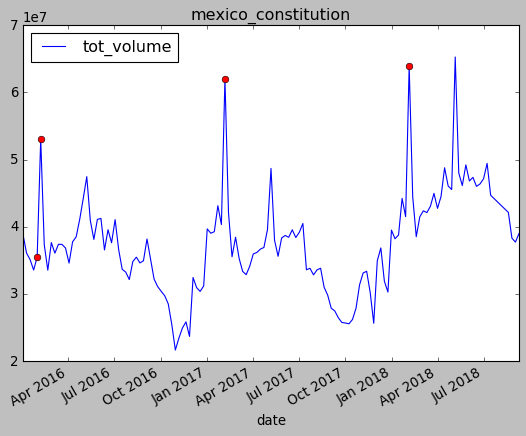

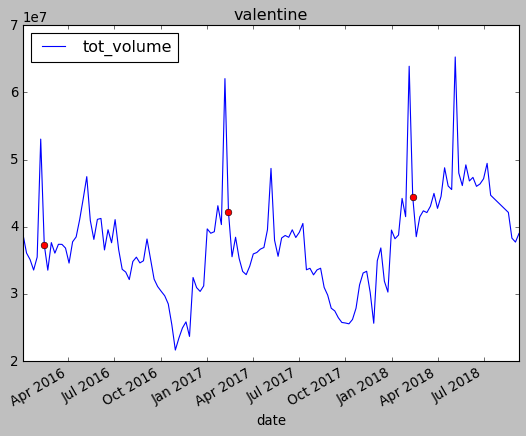

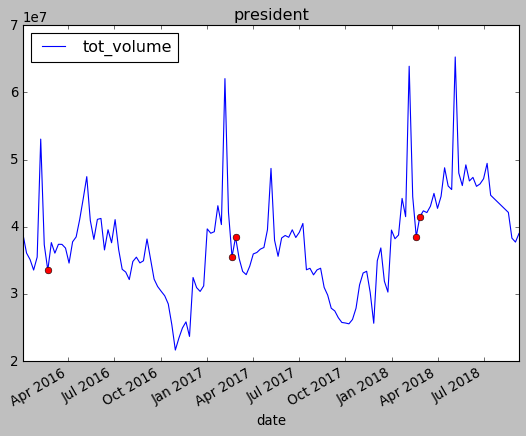

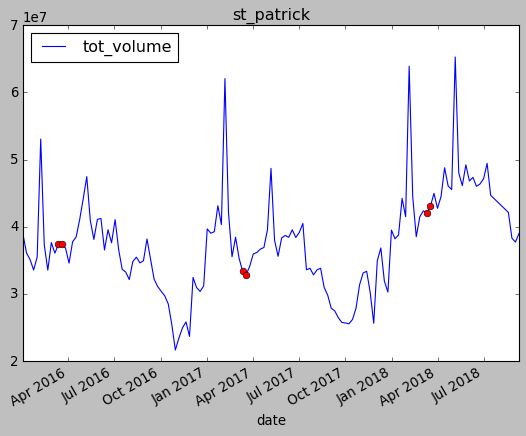

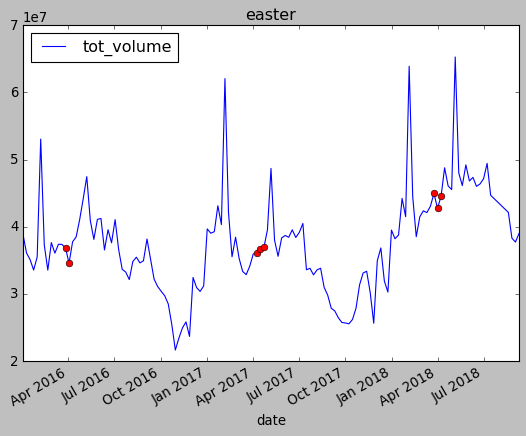

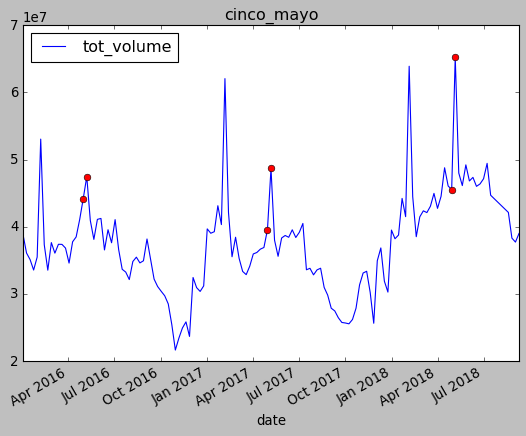

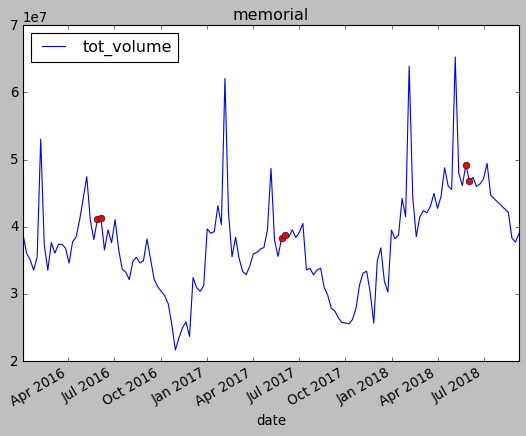

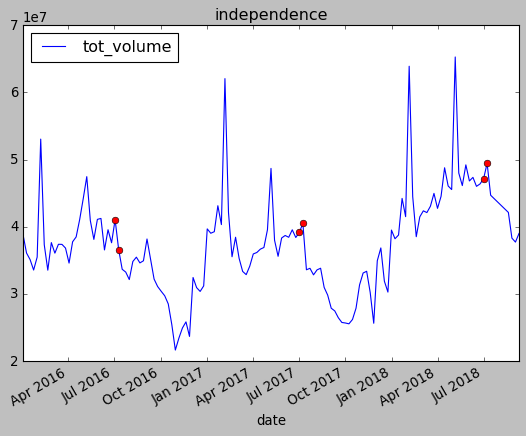

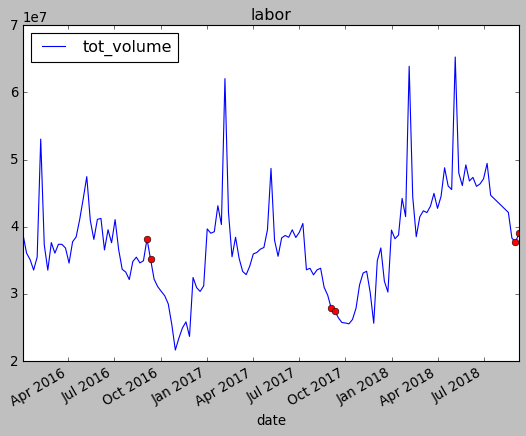

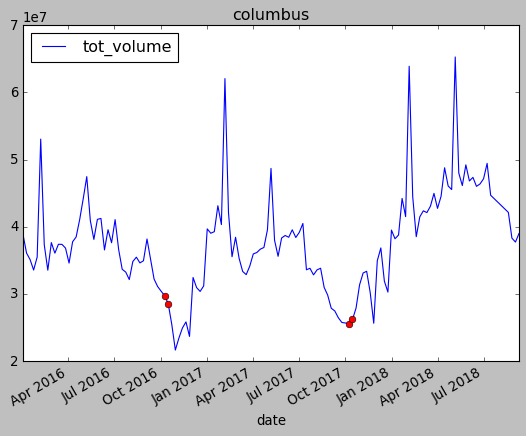

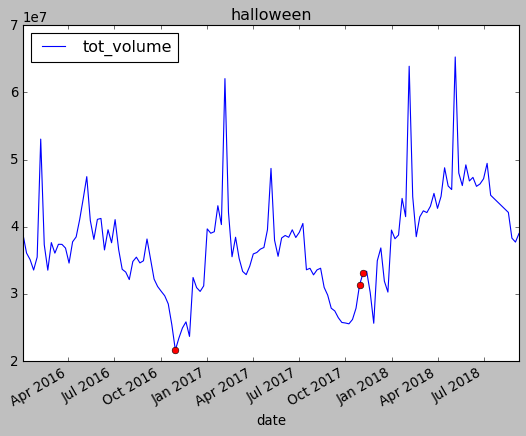

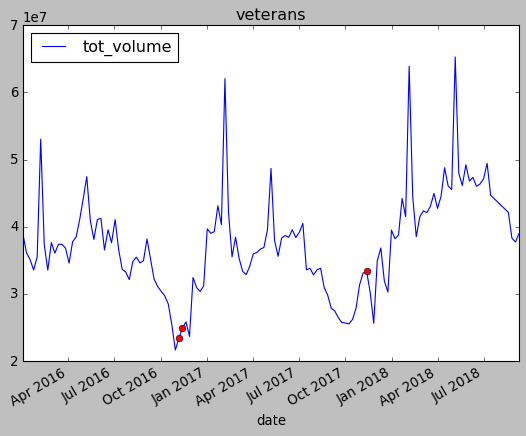

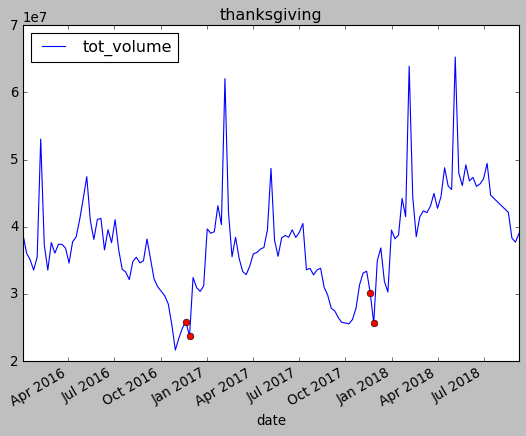

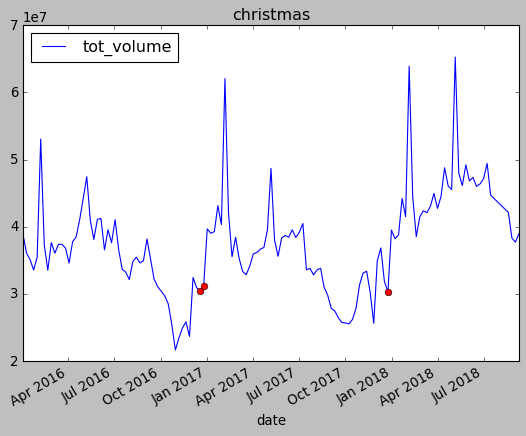

In [27]:
for day in holidays:
    # plot the total volume of avocados as line plot
    df.plot(y=['tot_volume'])
    # plot the holiday as red dots
    h_df = df[df['holiday']==day]
    plt.plot(h_df['tot_volume'],'ro')
    plt.title(day)
    plt.show()
    
df.drop('tot_volume',axis=1,inplace=True)

Looking at these plots, the holidays that seem to have the most impact on the volume of avocado sold are Mexico constitution and Cinco de Mayo.

## Plot the volume of each type of avocado 

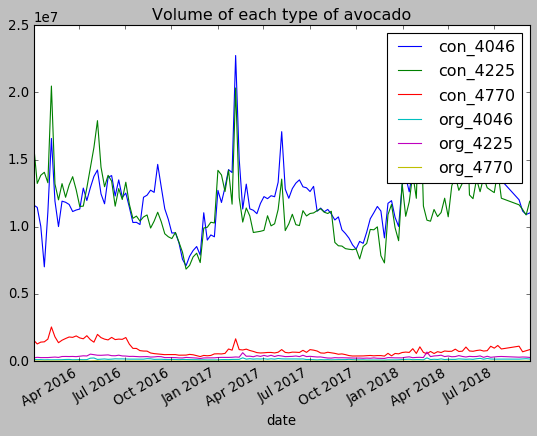

In [28]:
df.plot(y=['con_4046','con_4225','con_4770','org_4046','org_4225','org_4770'])
plt.title('Volume of each type of avocado')
plt.legend()
plt.show()

Types 4046 and 4225 are dominant.
I want to see if all types of avocados follow the same trend, so I will plot them on separated plots.

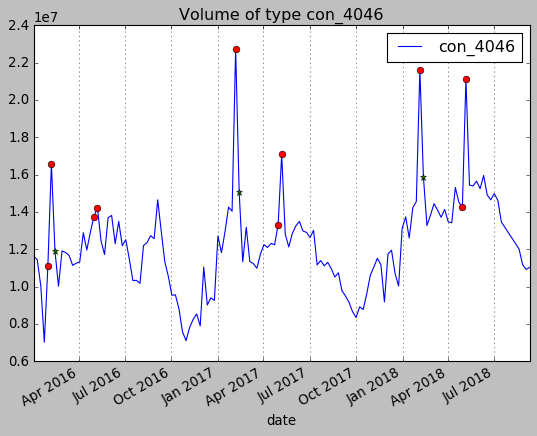

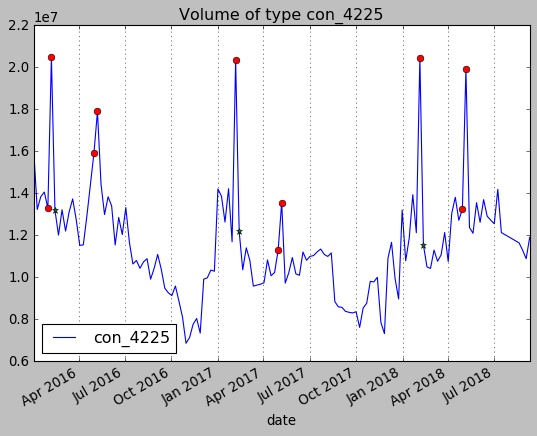

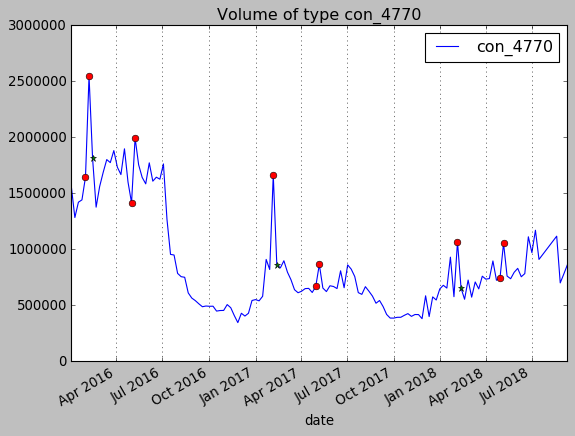

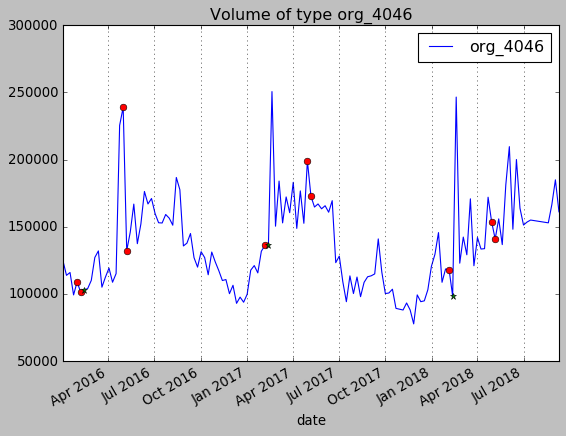

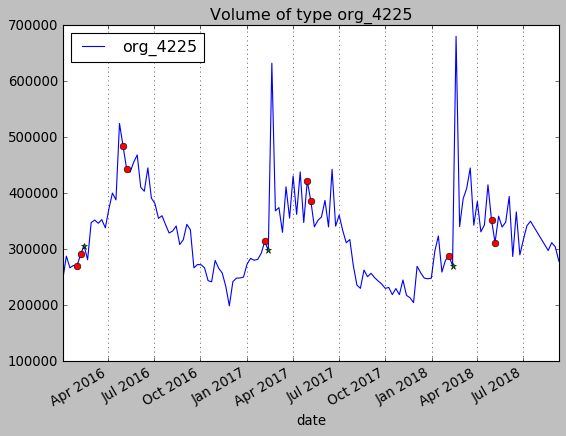

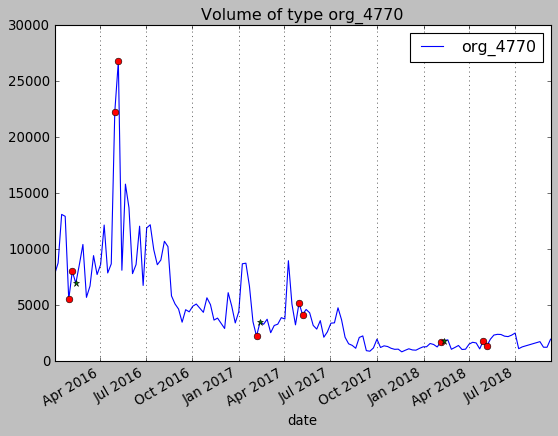

In [29]:
# Define a dataframe for mexico constitution and cinco de mayo only
h_df = df[(df['holiday']=='mexico_constitution')|(df['holiday']=='cinco_mayo')]
h2_df = df[df['holiday']=='valentine']

for av_type in ['con_4046','con_4225','con_4770','org_4046','org_4225','org_4770']:
    df.plot(y=[av_type])
    plt.plot(h_df[av_type],'ro')
    plt.plot(h2_df[av_type],'g*') #Plot Valentine as green star (organic avocados)
    plt.title('Volume of type ' + av_type)
    plt.grid(axis='x')
    plt.show()



It seems that conventional avocados have peaks for Mexico Constitution and Cinco de Mayo.
However, it's not always the case for organic avocados.

Over years, we can notice that type 4770 (extra large avocados) are in decline for conventional and organic. I think the volume for these types of avocados will be more difficult to predict.

4225 type (large avocados) volume seems stable over the years.

4046 type (small/medium avocados) become more and more popular over years.

## Plot the volume of each size of bags

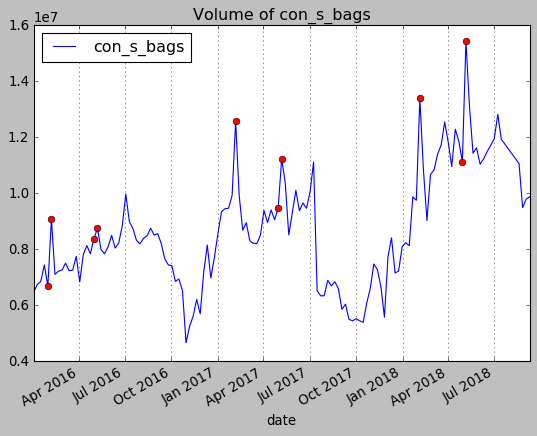

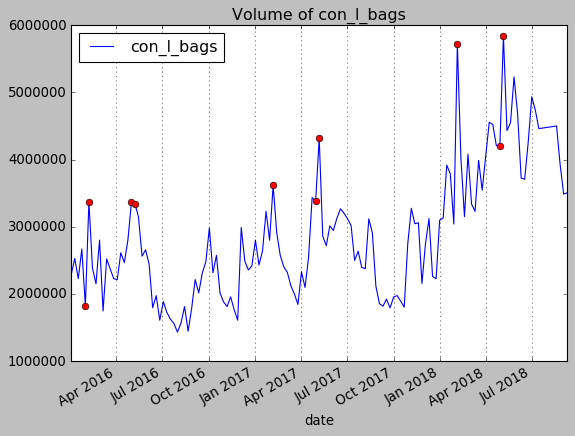

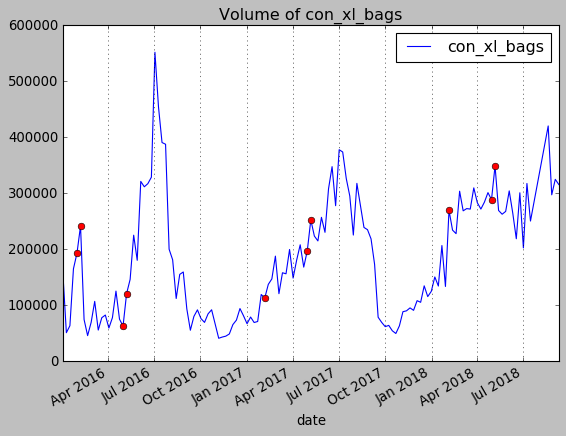

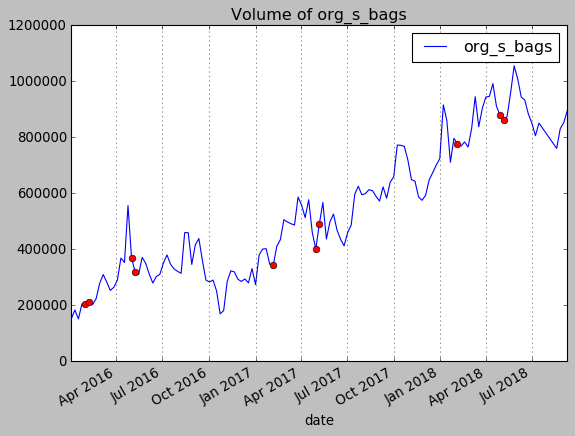

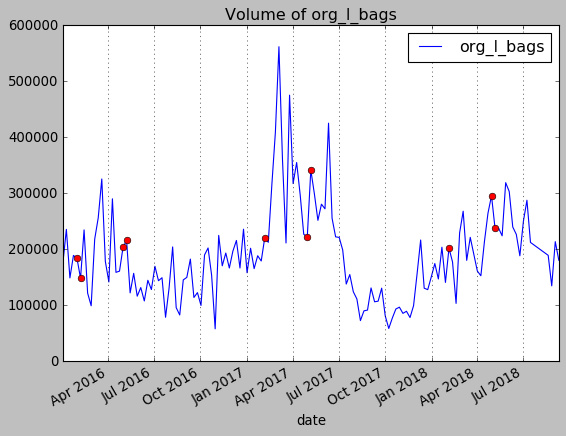

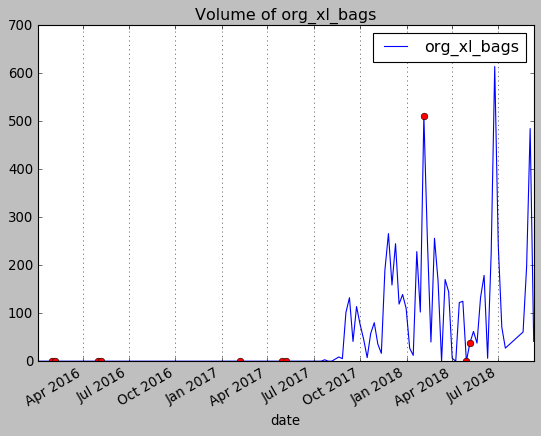

In [30]:
for av_bags in ['con_s_bags','con_l_bags','con_xl_bags','org_s_bags','org_l_bags','org_xl_bags']:
    df.plot(y=[av_bags])
    plt.plot(h_df[av_bags],'ro')
    plt.title('Volume of ' + av_bags)
    plt.grid(axis='x')
    plt.show()



It seems that conventional small and large bags follow the Mexican holiday pattern.
It's not obvious for the other bags.
However, they all follow the summer/winter trend.


## Plot the price for conventional and organic avocados

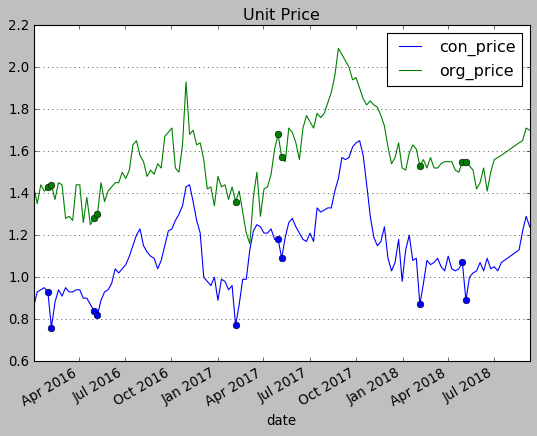

In [31]:
df.plot(y=['con_price','org_price'], title = 'Unit Price')
plt.plot(h_df['con_price'],'bo')
plt.plot(h_df['org_price'],'go')
plt.grid(axis='y')
plt.show()

- The price of avocados increases slightly over years, but the price difference between organic and conventional avocados remains consistent over years.
- The conventional avocado price is lower for the Mexican holidays, this could explain why the conventional avocado sales increase during these holidays
- The organic avocado sales remain stable.
- The price of avocados is higher in winter months, this is a good reason for buying less in winter.

## Plot a scatter plot price/volume for each category of avocado

In [32]:
import seaborn as sns

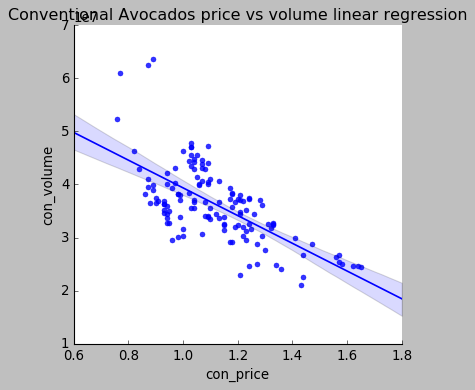

In [33]:
sns.lmplot(x='con_price', y='con_volume',data=df)
plt.title('Conventional Avocados price vs volume linear regression')
plt.show()

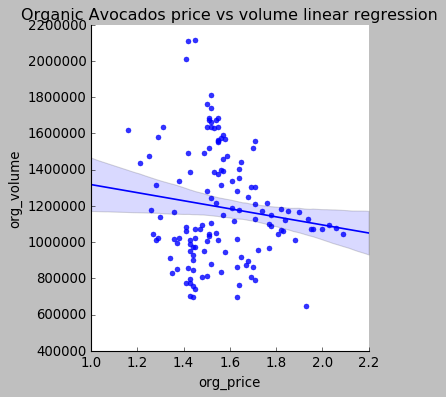

In [34]:
sns.lmplot(x='org_price', y='org_volume',data=df)
plt.title('Organic Avocados price vs volume linear regression')
plt.show()

There is a clear correlation between price and volume for conventional avocados.
But organic avocados customers seem less sensitive to price.